Import neceessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

Define input values (X) and their corresponding expected outputs (Y)

In [10]:
X = np.array([0.5, 2.5])
Y = np.array([0.2, 0.9])

Sigmoid activation function

In [11]:
def f(w, b, x):
    return 1.0 / (1.0 + np.exp(-(w * x + b)))

Error function (Mean Squared Error)

In [12]:
def error(w, b):
    err = 0.0
    for x, y in zip(X, Y):
        fx = f(w, b, x)
        err += 0.5 * (fx - y) ** 2
    return err

Gradient of error w.r.t weight (w)

In [13]:
def grad_w(w, b, x, y):
    fx = f(w, b, x)
    return (fx - y) * fx * (1 - fx) * x

Gradient of error w.r.t bias (b)

In [14]:
def grad_b(w, b, x, y):
    fx = f(w, b, x)
    return (fx - y) * fx * (1 - fx)

Adagrad Algorithm (Adaptive Learning Rate)


    Adagrad adjusts the learning rate based on past gradients:
    
    Formula:
        v_w = v_w + (dw)^2
        v_b = v_b + (db)^2

        w = w - (eta / sqrt(v_w + eps)) * dw
        b = b - (eta / sqrt(v_b + eps)) * db

    This allows higher learning rates for rare features and lowers it for frequent ones.


In [15]:
def do_adagrad():
    w, b = -2, -2
    eta = 0.1
    v_w, v_b = 0, 0
    eps = 1e-8
    max_epochs = 1000
    w_path, b_path = [], []

    for i in range(max_epochs):
        dw, db = 0, 0
        for x, y in zip(X, Y):
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)

        v_w += dw ** 2
        v_b += db ** 2

        w = w - (eta / np.sqrt(v_w + eps)) * dw
        b = b - (eta / np.sqrt(v_b + eps)) * db

        w_path.append(w)
        b_path.append(b)

    return w_path, b_path

RMSProp Algorithm (Root Mean Square Propagation)


    RMSProp uses an exponentially decaying average of past squared gradients:

    Formula:
        v_w = beta1 * v_w + (1 - beta1) * (dw)^2
        v_b = beta1 * v_b + (1 - beta1) * (db)^2

        w = w - (eta / sqrt(v_w + eps)) * dw
        b = b - (eta / sqrt(v_b + eps)) * db

    This prevents the learning rate from shrinking too much (as in Adagrad).

In [16]:
def do_rmsprop():
    w, b = -2, -2
    eta = 0.1
    v_w, v_b = 0, 0
    eps = 1e-8
    beta1 = 0.9
    max_epochs = 1000
    w_path, b_path = [], []

    for i in range(max_epochs):
        dw, db = 0, 0
        for x, y in zip(X, Y):
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)

        v_w = beta1 * v_w + (1 - beta1) * (dw ** 2)
        v_b = beta1 * v_b + (1 - beta1) * (db ** 2)

        w = w - (eta / np.sqrt(v_w + eps)) * dw
        b = b - (eta / np.sqrt(v_b + eps)) * db

        w_path.append(w)
        b_path.append(b)

    return w_path, b_path

Adam (Adaptive Moment Estimation) Algorithm


    Adam combines Momentum and RMSProp:

    Formula:
        m_w = beta1 * m_w + (1 - beta1) * dw   # First moment estimate
        m_b = beta1 * m_b + (1 - beta1) * db
        
        v_w = beta2 * v_w + (1 - beta2) * (dw)^2  # Second moment estimate
        v_b = beta2 * v_b + (1 - beta2) * (db)^2

        Bias correction:
        m_w_hat = m_w / (1 - beta1^t)
        m_b_hat = m_b / (1 - beta1^t)

        v_w_hat = v_w / (1 - beta2^t)
        v_b_hat = v_b / (1 - beta2^t)

        w = w - (eta / sqrt(v_w_hat + eps)) * m_w_hat
        b = b - (eta / sqrt(v_b_hat + eps)) * m_b_hat

In [18]:
def do_adam():
    w, b = -2, -2
    eta = 0.1
    beta1 = 0.9  # Exponential decay rate for first moment estimate
    beta2 = 0.999  # Exponential decay rate for second moment estimate
    eps = 1e-8
    m_w, m_b = 0, 0  # First moment vectors
    v_w, v_b = 0, 0  # Second moment vectors
    max_epochs = 1000
    w_path, b_path = [], []

    for i in range(max_epochs):
        dw, db = 0, 0
        for x, y in zip(X, Y):
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)

        m_w = beta1 * m_w + (1 - beta1) * dw
        m_b = beta1 * m_b + (1 - beta1) * db

        v_w = beta2 * v_w + (1 - beta2) * (dw ** 2)
        v_b = beta2 * v_b + (1 - beta2) * (db ** 2)

        m_w_hat = m_w / (1 - beta1 ** (i + 1))  # Bias correction
        m_b_hat = m_b / (1 - beta1 ** (i + 1))

        v_w_hat = v_w / (1 - beta2 ** (i + 1))  # Bias correction
        v_b_hat = v_b / (1 - beta2 ** (i + 1))

        w = w - (eta / np.sqrt(v_w_hat + eps)) * m_w_hat
        b = b - (eta / np.sqrt(v_b_hat + eps)) * m_b_hat

        w_path.append(w)
        b_path.append(b)

    return w_path, b_path

Create a mesh grid for 3D visualization

In [19]:
W = np.linspace(-3, 3, 50)
B = np.linspace(-3, 3, 50)
W, B = np.meshgrid(W, B)

Compute the error function on the entire grid

In [20]:
Z = np.array([[error(w, b) for w, b in zip(W_row, B_row)] for W_row, B_row in zip(W, B)])

Get the optimization paths using Adagrad, RMSProp, and Adam

In [21]:
adagrad_w_path, adagrad_b_path = do_adagrad()
rmsprop_w_path, rmsprop_b_path = do_rmsprop()
adam_w_path, adam_b_path = do_adam()

3D Visualization of the error surface and gradient descent paths

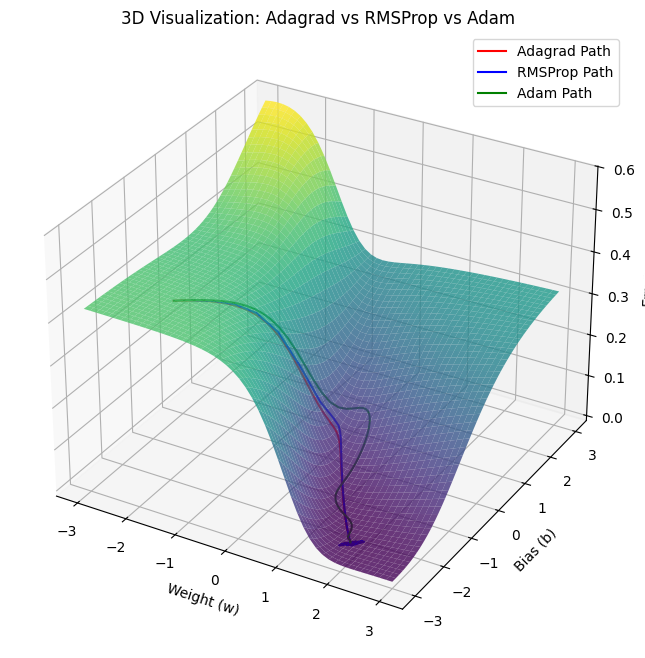

In [22]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the error surface
ax.plot_surface(W, B, Z, cmap='viridis', alpha=0.8)

# Plot the optimization paths
ax.plot(adagrad_w_path, adagrad_b_path, [error(w, b) for w, b in zip(adagrad_w_path, adagrad_b_path)],
        color='red', label="Adagrad Path")

ax.plot(rmsprop_w_path, rmsprop_b_path, [error(w, b) for w, b in zip(rmsprop_w_path, rmsprop_b_path)],
        color='blue', label="RMSProp Path")

ax.plot(adam_w_path, adam_b_path, [error(w, b) for w, b in zip(adam_w_path, adam_b_path)],
        color='green', label="Adam Path")

# Label axes
ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Error')
ax.set_title('3D Visualization: Adagrad vs RMSProp vs Adam')

plt.legend()
plt.show()